# Trafic Light: Train an AI Trafic Light Manager using a Simulator of a Junction Trafic Simulator


### Agent Setup

In [1]:
from trainer import AISimAgent
import ray
agent = AISimAgent('traffic_light')
print(ray.available_resources())

# traffic_light Created!


In [2]:
_config = {"num_workers"  : 15, "num_cpus_per_worker":1} # set it accordingly to the cluster configuration. Add "num_gpus": 1 if a GPU is available
agent.train(iterations=50, ai_config=_config)
agent.train(iterations=50, ai_config=_config)

# Training Session 1 started at 2021-03-19 15:24:56.014773!
# Progress: 100.0% # Best Mean Reward: -71.91 
# Training Session 1 ended at 2021-03-19 15:37:00.612805!
# Training Session 2 started at 2021-03-19 15:37:00.636518!
# Progress: 100.0% # Best Mean Reward: -58.25 
# Training Session 2 ended at 2021-03-19 15:49:02.699014!


In [3]:
sim_config = {
    "SIM_HOURS": 2, # Simulation time in hours
    "ACTION_INTERVAL_SECONDS": 20, # Time between each action can be performed
    "MTBC": [40, 10, 50, 15, 40, 15, 60, 45] # ['South/North', 'North/South', 'South/West', 'North/East', 'West/East', 'East/West', 'West/North', 'East/South']
}
_config = {"num_workers"  : 15, "num_cpus_per_worker":1}
agent.train(iterations=50, ai_config=_config, sim_config=sim_config)
agent.train(iterations=50, ai_config=_config, sim_config=sim_config)

# Training Session 3 started at 2021-03-19 15:49:08.094638!
# Progress: 100.0% # Best Mean Reward: -116.33 
# Training Session 3 ended at 2021-03-19 16:05:00.978909!
# Training Session 4 started at 2021-03-19 16:05:01.004216!
# Progress: 100.0% # Best Mean Reward: -125.19 
# Training Session 4 ended at 2021-03-19 16:24:18.722287!


In [4]:
agent.get_sim_config()

,id,name,baseline_avg,config
0,1,Base Config,-142.050237,"{""SIM_HOURS"": 2, ""ACTION_INTERVAL_SECONDS"": 20..."
1,2,Config 1,-2754.643354,"{""SIM_HOURS"": 2, ""ACTION_INTERVAL_SECONDS"": 20..."


Matplotlib is building the font cache; this may take a moment.


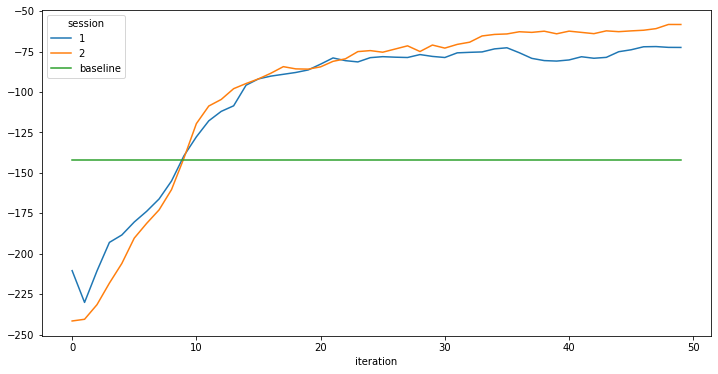

In [5]:
import matplotlib.pyplot as plt
import seaborn as sn
agent.get_training_data(baseline=True, sim_config=1).plot(figsize=(12,6))
plt.show()

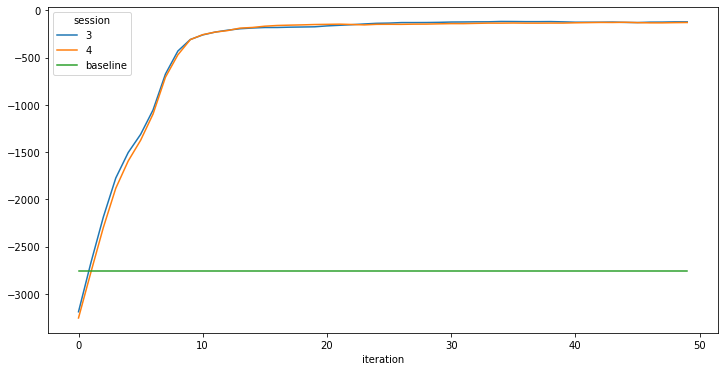

In [6]:
agent.get_training_data(baseline=True, sim_config=2).plot(figsize=(12,6))
plt.show()

In [7]:
agent.get_policies()

,sim_config,policy,session
0,1,1,1
1,1,2,2
2,2,3,3
3,2,4,4


In [8]:
agent.run_policies(simulations=50)

# Running AI Policy 1 started at 2021-03-19 16:24:37.850166!
# Progress: 100.0% 
# Running AI Policy 1 ended at 2021-03-19 16:25:28.413228!
# Running AI Policy 2 started at 2021-03-19 16:25:28.413300!
# Progress: 100.0% 
# Running AI Policy 2 ended at 2021-03-19 16:26:21.278670!
# Running AI Policy 3 started at 2021-03-19 16:26:21.278717!
# Progress: 100.0% 
# Running AI Policy 3 ended at 2021-03-19 16:27:19.164950!
# Running AI Policy 4 started at 2021-03-19 16:27:19.165009!
# Progress: 100.0% 
# Running AI Policy 4 ended at 2021-03-19 16:28:20.920926!


In [9]:
agent.run_baselines(simulations=50, sim_config=1)
agent.run_baselines(simulations=50, sim_config=2)

# Baseline Simulation for Config 1 started at 2021-03-19 16:28:20.986850!
# Baseline Simulation for Config 1 ended at 2021-03-19 16:28:29.827172!
# Baseline Simulation for Config 2 started at 2021-03-19 16:28:29.828272!
# Baseline Simulation for Config 2 ended at 2021-03-19 16:28:40.999433!


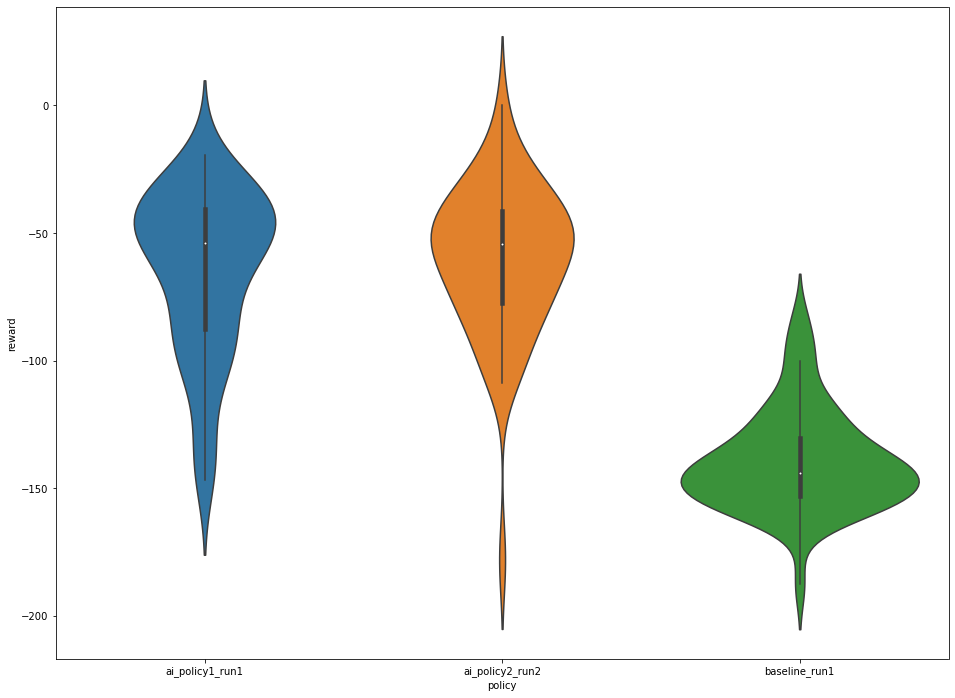

In [13]:
df = agent.get_policy_run_data(sim_config=1)
plt.figure(figsize=(16,12))
sn.violinplot(x="policy", y="reward", data=df, showfliers = False)
plt.show()

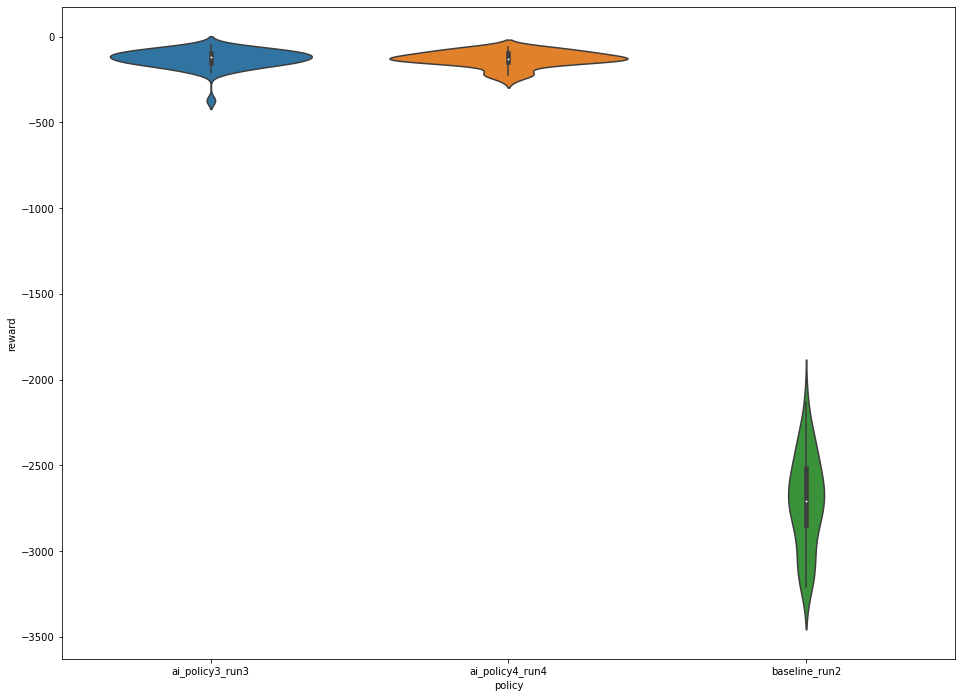

In [11]:
df = agent.get_policy_run_data(sim_config=2)
plt.figure(figsize=(16,12))
sn.violinplot(x="policy", y="reward", data=df, showfliers = False)
plt.show()